In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
from scipy.stats import norm
from scipy.stats import linregress

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Calculation of correlation coefficients in order to see if the features are correlated
Correlation features_1/features_2: -0.005219711383220027
Correlation features_1/features_2: -0.005219711383220027
Correlation features_2/features_3: 0.04735993943504083
These 3 features are not correlated


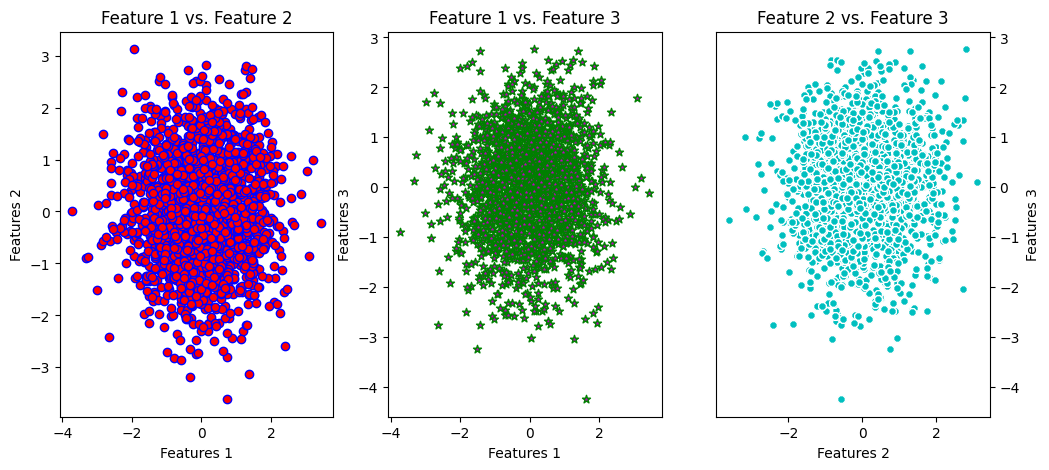

In [23]:
file_name = "regression_generated.csv"
df = pd.read_csv(file_name)
#########################################
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
f1 = df.iloc[:,1]
f2 = df.iloc[:,2]
f3 = df.iloc[:,3]
#########################################
ax1.scatter(f1, f2, marker='o', c='r', edgecolor='b')
ax1.set_title('Feature 1 vs. Feature 2')
ax1.set_xlabel('Features 1')
ax1.set_ylabel('Features 2')
#########################################
ax2.scatter(f1, f3, marker='*', c='m', edgecolor='g')
ax2.set_title('Feature 1 vs. Feature 3')
ax2.set_xlabel('Features 1')
ax2.set_ylabel('Features 3')
########################################
ax3.scatter(f2, f3, marker='8', c='c', edgecolor='w')
ax3.set_title('Feature 2 vs. Feature 3')
ax3.set_xlabel('Features 2')
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_ylabel('Features 3')
#########################################
print("Calculation of correlation coefficients in order to see if the features are correlated")
print("Correlation features_1/features_2:", f1.corr(f2))
print("Correlation features_1/features_2:", f1.corr(f2))
print("Correlation features_2/features_3:", f2.corr(f3))
print("These 3 features are not correlated")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

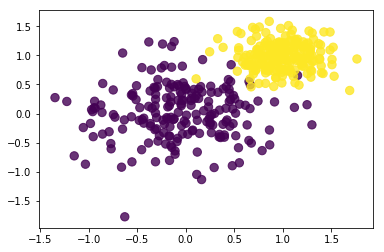

In [24]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

Set mean of first sample: 2
Set standard deviation of first sample: 0.5
Set dimension of first sample: 250
Set mean of second sample: 0
Set standard deviation of second sample: 0.25
Set dimension of second sample: 250


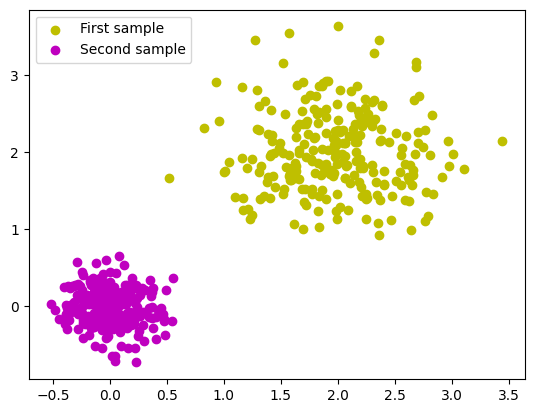

In [25]:
def colored(m1,m2,std1,std2):
    X1=np.random.normal(m1,std1,N1)
    Y1=np.random.normal(m1,std1,N1)
    X2=np.random.normal(m2,std2,N2)
    Y2=np.random.normal(m2,std2,N2)
    plt.scatter(X1,Y1, marker='o', c='y')
    plt.scatter(X2,Y2,marker='o', c='m')
    plt.legend(['First sample', 'Second sample'])

m1 = float(input("Set mean of first sample: "))
std1 = float(input("Set standard deviation of first sample: "))
N1 = int(input("Set dimension of first sample: "))
m2 = float(input("Set mean of second sample: "))
std2 = float(input("Set standard deviation of second sample: "))
N2 = int(input("Set dimension of second sample: "))

colored(m1,m2,std1,std2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]
Correlation factor:  0.043403510522559086
The two variables are not correlated


<ErrorbarContainer object of 3 artists>

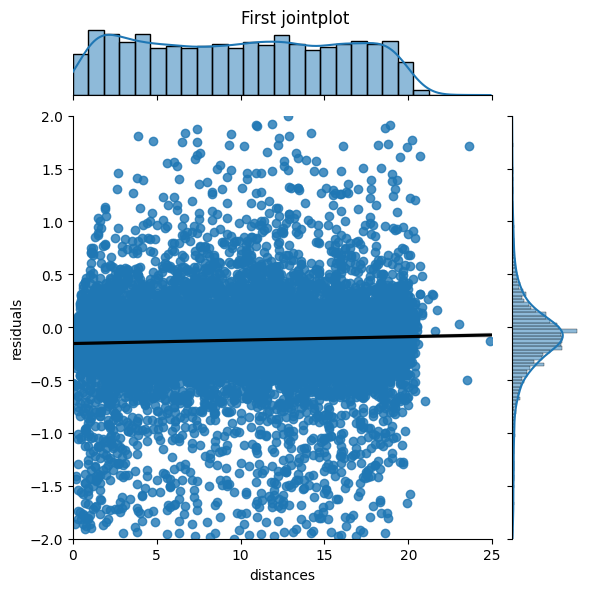

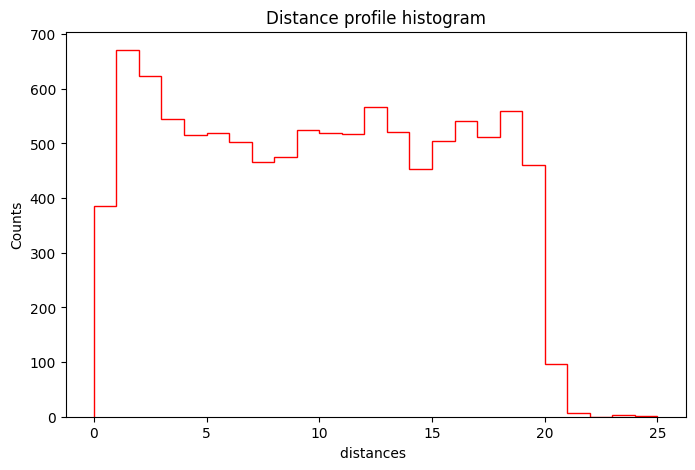

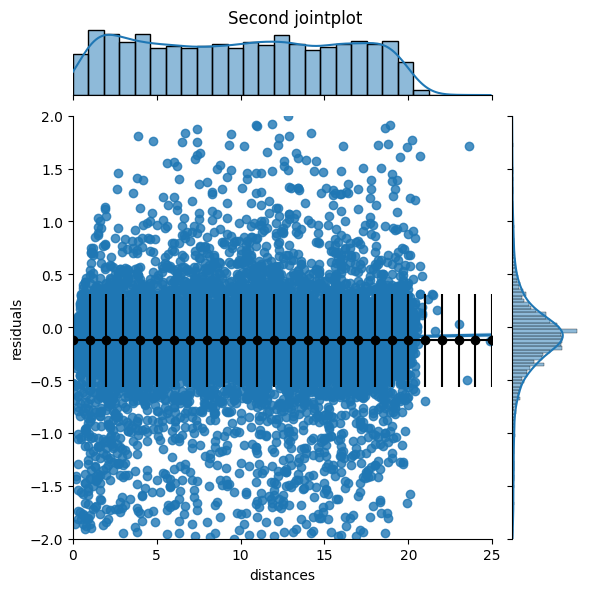

In [26]:
filename="residuals_261.pkl"
data=np.array(np.load(filename, allow_pickle = True))
df=pd.DataFrame(data[()])
df
clean_df = df[abs(df["residuals"])<2]
print(clean_df)
##################First jointplot
a = sns.jointplot(data=clean_df, x="distances", y="residuals",kind="reg",joint_kws={'line_kws':{'color':'k'}})
a.fig.suptitle("First jointplot")
a.fig.tight_layout()
a.fig.subplots_adjust(top=0.95)
a.ax_marg_x.set_xlim(0, 25)
a.ax_marg_y.set_ylim(-2, 2)
print("Correlation factor: ", clean_df["residuals"].corr(clean_df["distances"]))
print("The two variables are not correlated")
##############################Profile histogram
fig = plt.figure(figsize=(8, 5))
plt.hist(clean_df["distances"], range=(0, 25), bins=25, histtype="step", color="red")
ax = fig.axes[0]
ax.set_title("Distance profile histogram")
ax.set_xlabel("distances ")
ax.set_ylabel("Counts")
############3 arrays
x = np.arange(0,26)
y = np.array([])
erry = np.array([])
for i in x:
    y = np.append(y, np.mean(clean_df['residuals']))
    erry = np.append(erry, np.std(clean_df['residuals']))
#second jointplot with overlapping
b = sns.jointplot(x=clean_df["distances"], y=clean_df["residuals"], data=clean_df, kind="reg");
b.fig.suptitle("Second jointplot")
b.fig.tight_layout()
b.fig.subplots_adjust(top=0.95)
b.ax_marg_x.set_xlim(0, 25)
b.ax_marg_y.set_ylim(-2, 2)
plt.errorbar(x=x, y=y , yerr=erry, marker = 'o', color = 'k')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Text(0, 0.5, 'Counts')

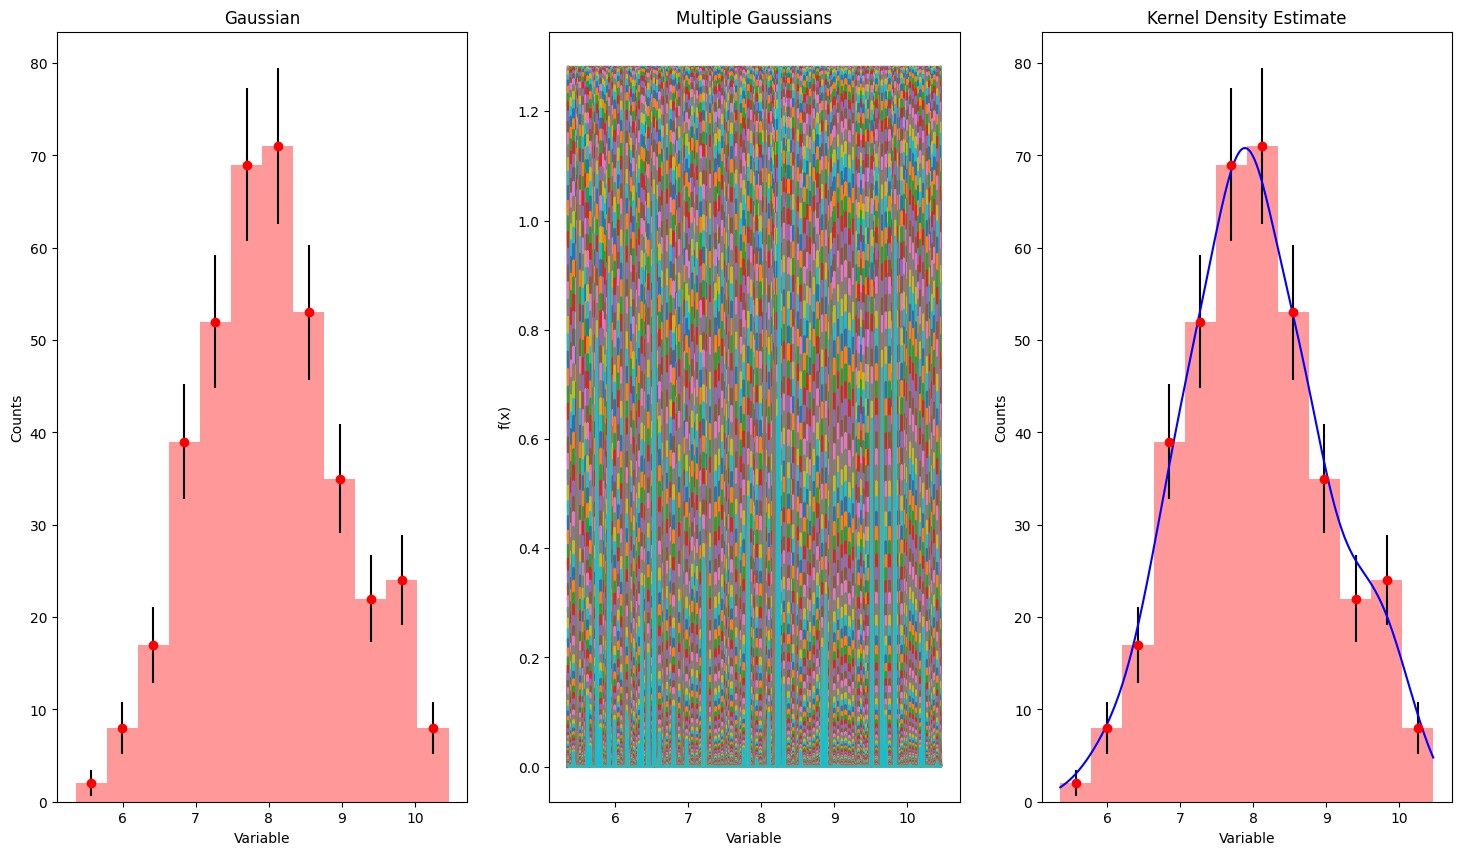

In [27]:
from scipy.stats import norm
N=400
mean=8
std=1
x=np.random.normal(mean, std, N)
y,binEdges = np.histogram(x,bins=12)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
    
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18, 10))
hist, bins, patches=ax1.hist(x, bins=12, color='r', alpha=0.4)
ax1.errorbar(bincenters, y, yerr=menStd, fmt='o', color='r', ecolor='black')
ax1.set_ylabel("Counts")
ax1.set_xlabel("Variable")
ax1.set_title("Gaussian")
    
#Gaussian for each x
mu=1.06*x.std()*x.size**(-1/5)
gaussians=[]
points=np.linspace(x.min(), x.max(), N,True)
for xi in x:
    gaussians.append(norm.pdf(points, xi, mu))

ax2.plot(points,gaussians)    
ax2.set_title("Multiple Gaussians")
ax2.set_xlabel("Variable")
ax2.set_ylabel("f(x)")
#Kernel Density Estimate"
sum_gaussian=np.sum(gaussians, axis=0)
original_integral=np.sum(np.diff(bins)*hist)
norm = original_integral/scipy.integrate.trapz(y=sum_gaussian, x=points)
norm_sum_gaussian=sum_gaussian*norm
ax3.errorbar(bincenters, y, yerr=menStd, fmt='o', color='r', ecolor='black')
ax3.plot(points, norm_sum_gaussian,color = "blue")
ax3.hist(x, bins=12, color='r', alpha=0.4)
ax3.set_title("Kernel Density Estimate")
ax3.set_xlabel("Variable")
ax3.set_ylabel("Counts")